In [139]:
import pandas as pd
from pandas import DataFrame 
import numpy as np
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [140]:
#首先总览一下数据
df = pd.read_csv('phones.csv', encoding = 'utf8')
df.head()

,id,band,mode,title,nickname,location,price,sales,comments
0,1,苹果,苹果 iPhone 8 Plus,Apple/苹果 iPhone 8 Plus,applestore官方旗舰店,上海,7988,29782,22909
1,2,苹果,苹果 iPhone 8 Plus,【详情页抢券减800】Apple/苹果iPhone 8 Plus 64G全网通4G手机,苏宁易购官方旗舰店,南京,6688,32000,28755
2,3,苹果,苹果 iPhone 8 Plus,【详情页领券减800】 Apple/苹果iPhone 8 Plus 256G全网通手机,苏宁易购官方旗舰店,南京,7988,5833,3996
3,4,苹果,苹果 iPhone 8 Plus,Apple/苹果 iPhone 8 Plus 苹果X 8plus手机 苹果8x港版国行现货,领域数码通讯,深圳,4938,2766,8867
4,5,苹果,苹果 iPhone 8 Plus,12期免息【2年保修】Apple/苹果 iPhone 8 Plus 4G版苹果智能手机,绿森数码官方旗舰店,杭州,6788,1236,3077


In [259]:
store_count = df.groupby('nickname').count()
store_count

,id,band,mode,title,location,price,sales,comments,level
nickname,,,,,,,,,
03数码分店,7,7,7,7,7,7,7,7,7
0532易通讯,6,6,6,6,6,6,6,6,6
07_zhangqi163,7,7,7,7,7,7,7,7,7
0lingyu0,3,3,3,3,3,3,3,3,3
0尹芙蓉0,23,23,23,23,23,23,23,23,23
1009企业店,1,1,1,1,1,1,1,1,1
104701020lu,1,1,1,1,1,1,1,1,1
12345678cpm,8,8,8,8,8,8,8,8,8
123低调点354414816,5,5,5,5,5,5,5,5,5


In [142]:
band_count = df.groupby('band').count()
band_count

,id,mode,title,nickname,location,price,sales,comments
band,,,,,,,,
360手机,823,823,823,823,823,823,823,823
8848,47,47,47,47,47,47,47,47
AEKU,116,116,116,116,116,116,116,116
AGM,100,100,100,100,100,100,100,100
Google,10,10,10,10,10,10,10,10
HTC,330,330,330,330,330,330,330,330
LG,231,231,231,231,231,231,231,231
MANN,56,56,56,56,56,56,56,56
OPPO,1562,1562,1562,1562,1562,1562,1562,1562


In [143]:
mode_count = df.groupby('mode').count()
mode_count

,id,band,title,nickname,location,price,sales,comments
mode,,,,,,,,
360 Q5,1,1,1,1,1,1,1,1
360 Q5PLUS,11,11,11,11,11,11,11,11
360手机 C5,28,28,28,28,28,28,28,28
360手机 F4,28,28,28,28,28,28,28,28
360手机 F4S,46,46,46,46,46,46,46,46
360手机 F5,63,63,63,63,63,63,63,63
360手机 N4,45,45,45,45,45,45,45,45
360手机 N4A,34,34,34,34,34,34,34,34
360手机 N4S,29,29,29,29,29,29,29,29


In [144]:
df['comments'].astype('int64')
df['sales'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44416 entries, 0 to 44415
Data columns (total 9 columns):
id          44416 non-null int64
band        44416 non-null object
mode        44416 non-null object
title       44416 non-null object
nickname    44416 non-null object
location    44416 non-null object
price       44416 non-null int64
sales       44416 non-null int64
comments    44416 non-null int64
dtypes: int64(4), object(5)
memory usage: 3.0+ MB


In [145]:
#发现最贵的居然到了46800,看看到底是那款手机这么贵
df.sort_values(by = 'price', ascending = False)[:20]
#这29999的诺基亚6是什么情况，也不是定制机，难道信仰无价？，发现价格昂贵的手机多为私人定制版或者限量版，价格高也难怪。

,id,band,mode,title,nickname,location,price,sales,comments
950,951,苹果,苹果 iPhone X,Apple/苹果 iPhone X 苹果10黄金限量版 银河星空 鬼王Venus定制,charlesshao,北京,46800,0,1
417,418,苹果,苹果 iPhone 8 Plus,Apple/苹果 iPhone 8 Plus 黄金限量版 银河星空 鬼王 Venus定制,charlesshao,北京,41800,0,0
949,950,苹果,苹果 iPhone X,Apple/苹果 iPhone X定制版24K纯金 苹果限量定制版手机,华通数码_英子,北京,36888,0,0
41928,41929,詹姆士,詹姆士 R19 PLUS,GEMRY/詹姆士 R19 plus高端商务智能全网通双4G安全奢贵华侈 手机,风子飞蝉,深圳,36857,0,0
1405,1406,苹果,苹果 iPhone 8,Apple/苹果 iPhone 8 24K黄金限量版 鬼王星空 Venus定制,charlesshao,北京,36800,0,0
32421,32422,诺基亚,诺基亚 诺基亚6,Nokia/诺基亚 诺基亚 6,bjhanzhiguo,北京,29999,0,0
41947,41948,詹姆士,詹姆士 R12,GEMRY/詹姆士 R12 美钻版小鳄鱼皮镶钻智能商务手机,詹姆士手机旗舰店,深圳,29800,0,0
39324,39325,8848,8848 M4,8848 M4私人订制宫廷红鳄鱼皮钛金手机4G全网通双卡双待商务手机,风子飞蝉,北京,25888,0,0
39330,39331,8848,8848 M4,8848私人订制午夜蓝鳄鱼皮M4限量版奢贵华侈钛金安全手机4G全网通,yizi168168,北京,25888,0,0
39329,39330,8848,8848 M4,8848私人订制宫廷红鳄鱼皮M4限量版奢贵华侈钛金安全手机4G全网通,yizi168168,北京,25888,0,0


In [146]:
#查看手机总出货量
total_sales = df['sales'].sum()
total_sales

2455597

In [147]:
bins = [0,1000,2000,3000,4000,6000,8000,50000]
level = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-6000', '6000-8000', '8000+']
df['level'] = pd.cut(df['price'], bins = bins, labels = level)
sales = df.groupby('level').sum().reset_index()
sales
nums = df.groupby('level').count()['id'].reset_index()
nums

,level,id
0,0-1000,20502
1,1000-2000,10178
2,2000-3000,6320
3,3000-4000,3368
4,4000-6000,2866
5,6000-8000,832
6,8000+,348


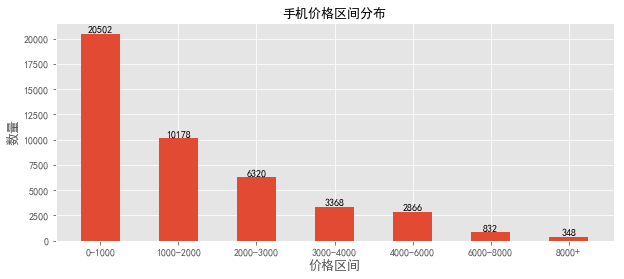

In [148]:
fig = plt.gcf()
fig.set_size_inches(10, 4)
level = nums['level']
ID = nums['id']
plt.bar(level,ID, width = 0.5)
plt.title('手机价格区间分布',fontsize = 13)
plt.xlabel('价格区间',fontsize = 13)
plt.ylabel('数量',fontsize = 13)
for a,b in zip(level,ID):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)


In [390]:
expensive = df[df['level']=='8000+']
bins = [8000,10000, 15000, 20000, 50000]
level = ['8000-10000','10000-15000', '15000-20000', '20000+']
expensive['level']=expensive_range = pd.cut(expensive['price'], bins = bins, labels = level)
expensive_avg = expensive.groupby('band')['price'].mean().sort_values(ascending = False).reset_index()
expensive['level'].value_counts()

/home/lwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


8000-10000     194
10000-15000     97
15000-20000     33
20000+          24
Name: level, dtype: int64

Text(0,0.5,'品牌')

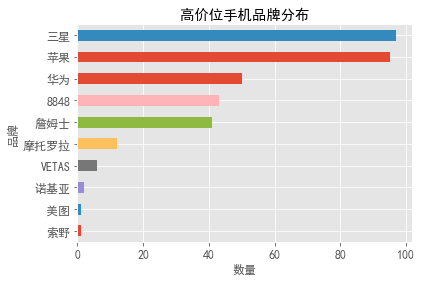

In [373]:
num = expensive.groupby('band')['mode'].count().sort_values(ascending = True)
num.plot.barh(fontsize = 12)
plt.title('高价位手机品牌分布')
plt.xlabel('数量')
plt.ylabel('品牌')

In [150]:
words = []
stopwords = ['能手','全网通','手机','全网','网通']
for title in expensive['title']:
    text = jieba.cut(title, cut_all = True)
    for word in text:
        if word not in stopwords:
            words.append(word)
words = ",".join(words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.760 seconds.
Prefix dict has been built succesfully.


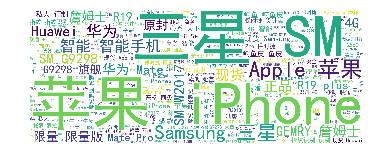

In [151]:
wordcloud = WordCloud(width = 2000, height = 800,max_words =300,max_font_size = 500,background_color="white",margin =2, font_path = 'simhei.ttf').generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

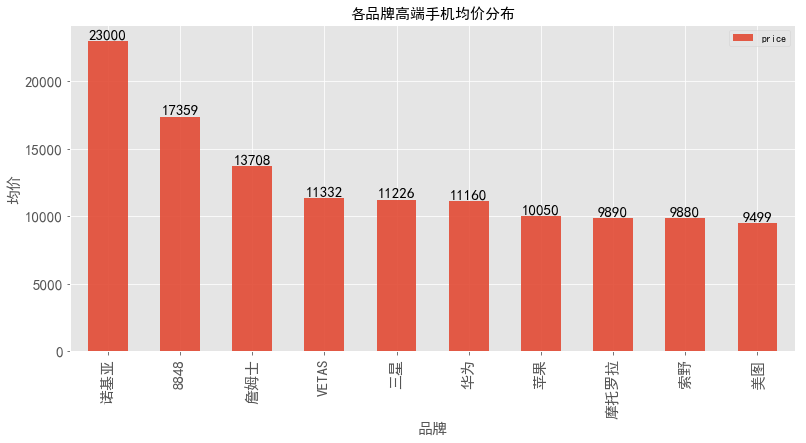

In [400]:
expensive_avg.plot(kind = 'bar',x= expensive_avg['band'],width = 0.55,alpha = 0.9,figsize = (13,6))
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(fontsize = 15)
plt.title('各品牌高端手机均价分布',fontsize=15)
plt.xlabel('品牌',fontsize=15)
plt.ylabel('均价',fontsize=15)
for a,b in zip(expensive_avg.index,expensive_avg['price']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)

/home/lwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x7fe267154860>,
 [Text(0.308404,1.05588,' 深圳'),
  Text(-1.1,-0.000562219,'上海'),
  Text(-0.656339,-0.882734,' 南京'),
  Text(0.0325581,-1.09952,'北京'),
  Text(0.505285,-0.977081,' 东莞'),
  Text(0.722018,-0.829873,' 济南'),
  Text(0.862791,-0.682343,' 杭州'),
  Text(0.966159,-0.525868,' 珠海'),
  Text(1.0269,-0.394298,' 桂林'),
  Text(1.05675,-0.305403,' 郑州'),
  Text(1.09176,-0.134351,'其他')],
 [Text(0.16822,0.575936,'41.0%'),
  Text(-0.6,-0.000306665,'18.1%'),
  Text(-0.358003,-0.481491,'11.5%'),
  Text(0.017759,-0.599737,'9.8%'),
  Text(0.27561,-0.532953,'4.5%'),
  Text(0.393828,-0.452658,'3.1%'),
  Text(0.470613,-0.372187,'2.8%'),
  Text(0.526996,-0.286837,'2.6%'),
  Text(0.560129,-0.215072,'1.6%'),
  Text(0.576411,-0.166583,'1.2%'),
  Text(0.595508,-0.0732821,'3.9%')])

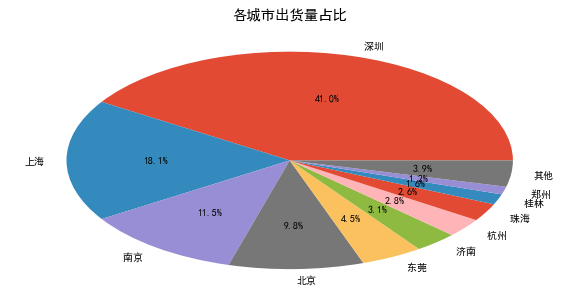

In [212]:
#查看各个城市出货量
region_rank =df.groupby('location')['sales'].sum().sort_values(ascending = False)
city = region_rank[:10]
city.ix['其他'] =df.groupby('location')['sales'].sum().sort_values(ascending = False)[11:].sum()
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('各城市出货量占比')
plt.pie(city,labels = city.index, autopct = '%1.1f%%')


Text(0,0.5,'城市')

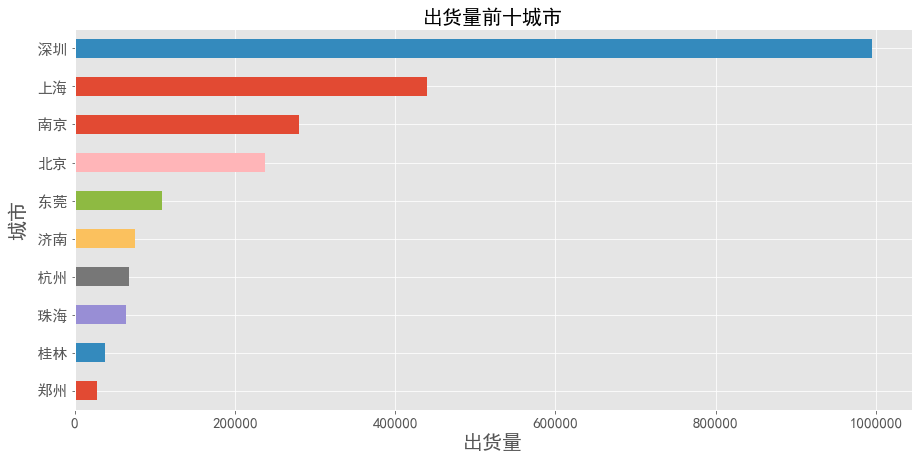

In [154]:
fig = plt.gcf()
fig.set_size_inches(15,7)
region_rank[:10].sort_values().plot(kind = 'barh',fontsize = 15)
plt.title('出货量前十城市',fontsize = 20)
plt.xlabel('出货量',fontsize = 20)
plt.ylabel('城市', fontsize = 20)

In [155]:
city

location
 深圳    994481
上海     439699
 南京    279861
北京     237198
 东莞    108817
 济南     75721
 杭州     67772
 珠海     64164
 桂林     37738
 郑州     28174
其他      94641
Name: sales, dtype: int64

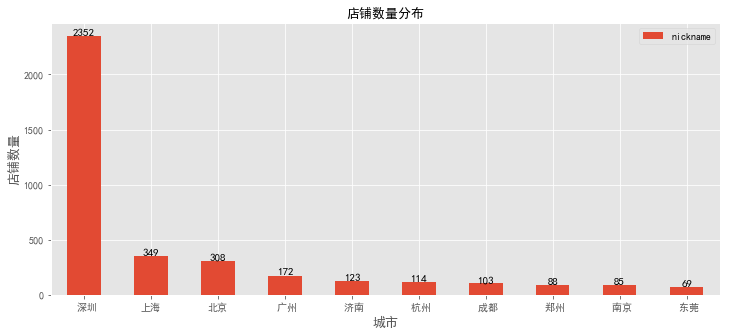

In [329]:
#查看店铺地理位置分布
region_rank =df.groupby(['location','nickname']).count().reset_index()
num = region_rank[['location','nickname']].groupby('location').count().sort_values(by ='nickname',ascending = False)[:10].reset_index()
num.plot(kind = 'bar',x = num['location'],rot= 0,figsize = (12,5))
plt.title('店铺数量分布',fontsize = 13)
plt.xlabel('城市',fontsize = 13)
plt.ylabel('店铺数量',fontsize = 13)
for a,b in zip(num.index,num['nickname']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)

In [157]:
#查看各个品牌销量
sales_rank = DataFrame(df.groupby('band')['sales'].sum().sort_values(ascending = False))[:10]
sales_rank.ix['其他'] = df.groupby('band')['sales'].sum().sort_values(ascending = False)[11:].sum()
sales_rank.reset_index()

/home/lwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,band,sales
0,苹果,595342
1,荣耀,337558
2,小米,317688
3,华为,183452
4,魅族,132710
5,vivo,129444
6,纽曼,121487
7,OPPO,86444
8,天语,80190
9,诺基亚,52296


Text(0,0.5,'出货量')

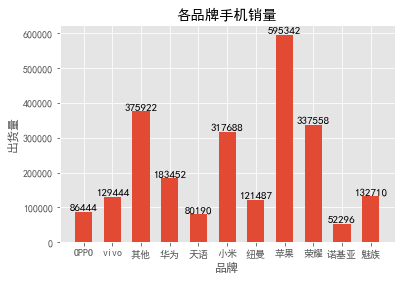

In [158]:
x = sales_rank.reset_index()['band']
y = sales_rank['sales']
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.bar(x, y,width = 0.6)
plt.figsize = (20,7)
plt.title('各品牌手机销量')
plt.xlabel('品牌')
plt.ylabel('出货量')

In [366]:
#各个手机品牌手机均价
sales_info = df[['band','mode' ,'sales', 'price']]
sales_info['total'] = sales_info['sales']*sales_info['price']
avg_price = sales_info.groupby('band').sum()
avg_price['avg_price'] = avg_price['total']/avg_price['sales']
avg_price =avg_price.sort_values(by = 'avg_price', ascending = False).reset_index()[:10]
avg_price = avg_price[['band', 'avg_price']]

/home/lwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


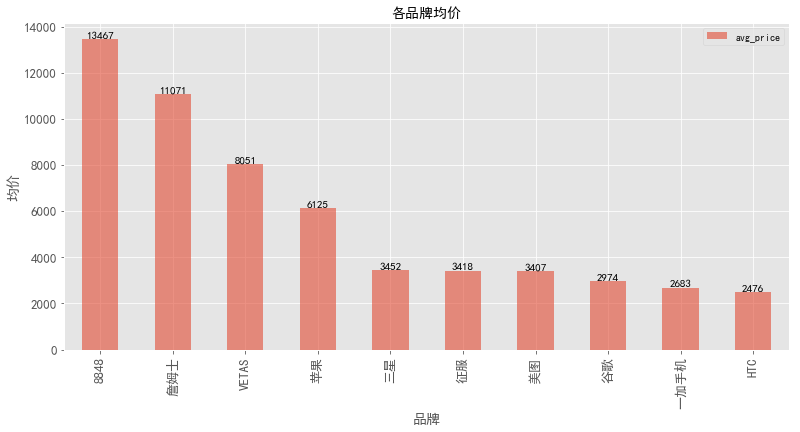

In [367]:
avg_price.plot(kind = 'bar',x = avg_price['band'],width = 0.5, alpha = 0.6,fontsize = 13,figsize = (13,6))
plt.title('各品牌均价',fontsize = 14)
plt.xlabel('品牌',fontsize = 14)
plt.ylabel('均价',fontsize = 14)
for a, b in zip(avg_price.index, avg_price['avg_price']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)


([<matplotlib.patches.Wedge at 0x7fe2670e5ac8>,
 [Text(0.785669,0.769886,'苹果'),
  Text(-0.447809,1.00472,'荣耀'),
  Text(-1.05143,0.323245,'小米'),
  Text(-1.03167,-0.381649,'华为'),
  Text(-0.792738,-0.762605,'魅族'),
  Text(-0.491685,-0.983995,'vivo'),
  Text(-0.149828,-1.08975,'纽曼'),
  Text(0.147106,-1.09012,'OPPO'),
  Text(0.37835,-1.03288,'天语'),
  Text(0.550047,-0.952601,'诺基亚'),
  Text(0.970812,-0.517227,'其他')],
 [Text(0.428547,0.419938,'24.7%'),
  Text(-0.244259,0.54803,'14.0%'),
  Text(-0.573509,0.176315,'13.2%'),
  Text(-0.562729,-0.208172,'7.6%'),
  Text(-0.432403,-0.415966,'5.5%'),
  Text(-0.268192,-0.536724,'5.4%'),
  Text(-0.0817245,-0.594408,'5.0%'),
  Text(0.0802398,-0.59461,'3.6%'),
  Text(0.206373,-0.563392,'3.3%'),
  Text(0.300026,-0.5196,'2.2%'),
  Text(0.529534,-0.282124,'15.6%')])

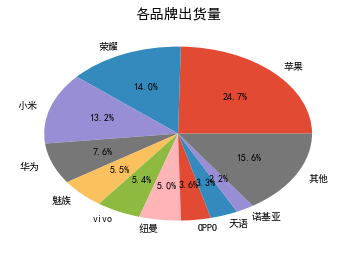

In [228]:
band = sales_rank.reset_index()['band']
plt.title('各品牌出货量')
plt.pie(sales_rank['sales'], labels = band, autopct = '%1.1f%%')

In [162]:
#查看各个店铺出货量前十
store_rank = DataFrame(df.groupby('nickname')['sales'].sum().sort_values(ascending = False))[:10]
store_rank.ix['其他'] = df.groupby('nickname')['sales'].sum().sort_values(ascending = False)[11:].sum()
store_rank.reset_index()

/home/lwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,nickname,sales
0,applestore官方旗舰店,320053
1,苏宁易购官方旗舰店,255741
2,荣耀官方旗舰店,188217
3,小米官方旗舰店,164733
4,华为官方旗舰店,74155
5,魅族官方旗舰店,62039
6,三际数码官方旗舰店,60478
7,vivo官方旗舰店,56160
8,创于佳讯数码专营店,54448
9,天语强宇专卖店,37736


([<matplotlib.patches.Wedge at 0x7fe27da0f978>,
 [Text(1.00661,0.443546,'applestore官方旗舰店'),
  Text(0.437545,1.00923,'苏宁易购官方旗舰店'),
  Text(-0.182447,1.08476,'荣耀官方旗舰店'),
  Text(-0.643008,0.892491,'小米官方旗舰店'),
  Text(-0.884479,0.653985,'华为官方旗舰店'),
  Text(-0.985623,0.488412,'魅族官方旗舰店'),
  Text(-1.05048,0.326326,'三际数码官方旗舰店'),
  Text(-1.08766,0.164316,'vivo官方旗舰店'),
  Text(-1.09998,0.00715642,'创于佳讯数码专营店'),
  Text(-1.09298,-0.124075,'天语强宇专卖店'),
  Text(0.0889869,-1.09639,'其他')],
 [Text(0.549061,0.241934,'13.2%'),
  Text(0.238661,0.550492,'10.6%'),
  Text(-0.0995167,0.591689,'7.8%'),
  Text(-0.350732,0.486813,'6.8%'),
  Text(-0.482443,0.356719,'3.1%'),
  Text(-0.537613,0.266407,'2.6%'),
  Text(-0.57299,0.177996,'2.5%'),
  Text(-0.593268,0.0896271,'2.3%'),
  Text(-0.599987,0.0039035,'2.2%'),
  Text(-0.596171,-0.0676774,'1.6%'),
  Text(0.0485383,-0.598033,'47.4%')])

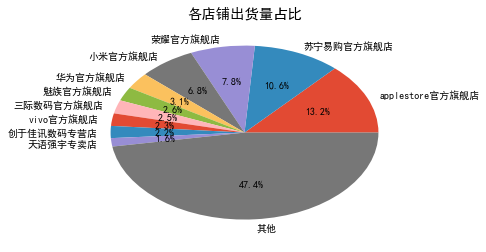

In [163]:
store = store_rank.reset_index()['nickname']
plt.title('各店铺出货量占比')
plt.figsize = (14,7)
plt.pie(store_rank['sales'], labels = store, autopct = '%1.1f%%')


In [335]:
#查看热销机型
mode_rank = DataFrame(df.groupby('mode')['sales'].sum().sort_values(ascending = False))[:10].reset_index()
mode_rank

,mode,sales
0,苹果 iPhone X,165801
1,苹果 iPhone 7 Plus,109227
2,苹果 iPhone 8 Plus,93230
3,苹果 iPhone 7,90213
4,荣耀 畅玩7X,77092
5,荣耀 V9 PLAY,58248
6,纽曼 M560,52740
7,小米 红米5A,49824
8,魅族 魅蓝note6,48201
9,小米 红米5 Plus,47363


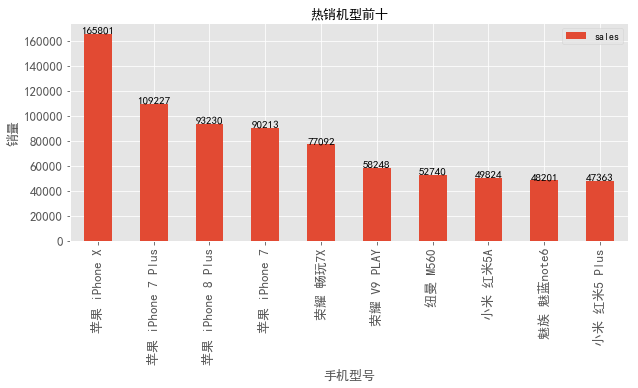

In [337]:
mode_rank.plot(kind = 'bar',x = mode_rank['mode'],fontsize = 13)
plt.title('热销机型前十',fontsize = 13)
plt.xlabel('手机型号',fontsize = 13)
plt.ylabel('销量',fontsize = 13)
for a,b in zip(mode_rank.index,mode_rank['sales']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
fig = plt.gcf()
fig.set_size_inches(10, 4)

In [166]:
titles = df['title']
l = []
stopwords = ['全网','网通','智能','能手','手机','老人','人机']
for word in titles:
    jieba.add_word('智能手机')
    text = jieba.cut(word ,cut_all=True) 
    for i in text:
        if i not in stopwords:
            l.append(i)
data = ",".join(l).strip()

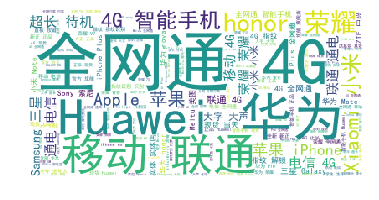

In [167]:
wordcloud = WordCloud(max_words =300,background_color="white",margin =1, font_path = 'simhei.ttf').generate(data)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()